In [77]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from pathlib import Path
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gnom2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gnom2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gnom2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


In [78]:
DATA_PATH = Path("../SouthParkData/All-seasons.csv")

In [111]:
south_park_data = pd.read_csv(DATA_PATH, header=0)
# remove junk rows
south_park_data.drop(south_park_data[south_park_data["Season"]=="Season"].index, inplace=True)

south_park_data["Season"] = south_park_data["Season"].astype(int)
south_park_data["Episode"] = south_park_data["Season"].astype(int)
south_park_data["Addressee"] = south_park_data["Character"].shift(periods=-1)
south_park_data

,Season,Episode,Character,Line,Addressee
0,10,10,Stan,"You guys, you guys! Chef is going away. \r\n",Kyle
1,10,10,Kyle,Going away? For how long?\r\n,Stan
2,10,10,Stan,Forever.\r\n,Chef
3,10,10,Chef,I'm sorry boys.\r\n,Stan
4,10,10,Stan,"Chef said he's been bored, so he joining a gro...",Chef
...,...,...,...,...,...
70891,9,9,Stan,I think you're pushing it.\r\n,Randy
70892,9,9,Randy,How about twenty?\r\n,Stan
70893,9,9,Stan,That's not disciprine.\r\n,Randy
70894,9,9,Randy,Right right. Does vodka count?\r\n,Stan


In [80]:
south_park_data["Line"].head()

0         You guys, you guys! Chef is going away. \r\n
1                        Going away? For how long?\r\n
2                                         Forever.\r\n
3                                  I'm sorry boys.\r\n
4    Chef said he's been bored, so he joining a gro...
Name: Line, dtype: object

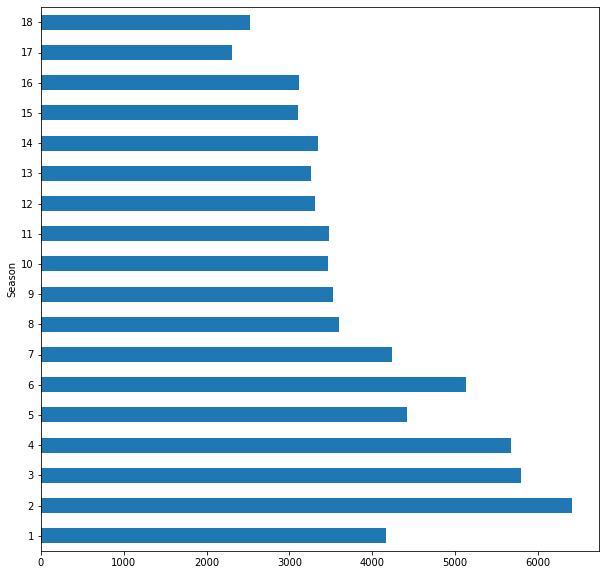

In [81]:
plt.figure(figsize=(10,10))
south_park_data.groupby("Season")["Line"].count().plot.barh()
plt.show()

In [123]:
def top_n_words(x, n=100):
    s = set(stopwords.words("english"))
    reg_exp_tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
    word_lemmatizer = WordNetLemmatizer()
    res = {}
    for i in x:
        tokens = [word_lemmatizer.lemmatize(word) for word in reg_exp_tokenizer.tokenize(i.lower()) if word not in s]
        for t in tokens:
            res.setdefault(t, 0)
            res[t] += 1
    res = sorted([(x[1], x[0]) for x in res.items()], reverse=True)
    return res[:n]

word_dict_seasons = south_park_data.groupby("Season")["Line"].agg(top_n_words).to_dict()

In [124]:
intersection = {x[1] for x in word_dict_seasons[1]}

for i in word_dict_seasons:
    intersection &= {x[1] for x in word_dict_seasons[i]}

print(sorted(list(intersection)))

['back', 'come', 'dude', 'get', 'go', 'god', 'going', 'gonna', 'good', 'got', 'guy', 'hey', 'kid', 'know', 'kyle', 'let', 'like', 'little', 'look', 'make', 'mean', 'need', 'oh', 'okay', 'one', 'people', 'really', 'right', 'say', 'see', 'take', 'tell', 'thing', 'think', 'time', 'u', 'uh', 'want', 'way', 'well', 'would', 'yeah', 'yes']


In [125]:
for i in word_dict_seasons:
    season_keywords = {x[1] for x in word_dict_seasons[i]}
    for j in word_dict_seasons:
        if j != i:
            season_keywords -= {x[1] for x in word_dict_seasons[j]}
    print(i, sorted(list(season_keywords)))

1 ['dog', 'grampa', 'kick', 'pig', 'triangle', 'whoa']
2 ['hankey', 'ned', 'remember', 'stanley']
3 ['chinpokomon', 'dreidel', 'ho', 'panda', 'sexual', 'tomorrow']
4 ['flag', 'keeper', 'pip', 'timmy', 'tooth']
5 ['best', 'scott', 'scout', 'towel', 'word']
6 ['bebe', 'tweek']
7 ['american', 'country', 'dumb', 'ha', 'lopez', 'war']
8 ['awesom', 'douche', 'future', 'gibson', 'jefferson', 'mart', 'mel', 'movie', 'news', 'ninja', 'robot', 'sandwich', 'trent', 'turd', 'vote', 'wall']
9 ['broke', 'dam', 'dead', 'egg', 'ginger', 'jimmy', 'talent', 'whale', 'woman']
10 ['11', '9', 'episode', 'family', 'hybrid', 'ike', 'manbearpig', 'mohammad', 'president', 'super', 'win']
11 ['ball', 'change', 'crap', 'homeless', 'hot', 'imaginary', 'imagination', 'list', 'louse', 'nigger', 'persian', 'picture', 'rabbit', 'terrorist', 'tourette']
12 ['aid', 'britney', 'cat', 'chinese', 'craig', 'flute', 'guinea', 'high', 'hiv', 'internet', 'obama', 'penis', 'peruvian', 'vampire']
13 ['economy', 'fag', 'fish', '

In [126]:
word_dict_characters = south_park_data.groupby("Character")["Line"].agg(top_n_words).to_dict()

In [127]:
word_dict_episodes = south_park_data.groupby(["Season", "Episode"])["Line"].agg(top_n_words).to_dict()

In [128]:
word_dict_characters["Stan"]

[(855, 'dude'),
 (532, 'yeah'),
 (417, 'oh'),
 (397, 'cartman'),
 (391, 'get'),
 (388, 'go'),
 (384, 'guy'),
 (362, 'know'),
 (343, 'come'),
 (337, 'gonna'),
 (329, 'dad'),
 (307, 'kyle'),
 (303, 'u'),
 (299, 'like'),
 (262, 'right'),
 (246, 'hey'),
 (239, 'think'),
 (236, 'okay'),
 (233, 'well'),
 (225, 'let'),
 (224, 'really'),
 (220, 'look'),
 (214, 'people'),
 (211, 'kenny'),
 (200, 'see'),
 (186, 'got'),
 (181, 'want'),
 (177, 'uh'),
 (176, 'back'),
 (167, 'time'),
 (153, 'one'),
 (151, 'god'),
 (150, 'need'),
 (150, 'butter'),
 (145, 'something'),
 (145, 'mean'),
 (142, 'make'),
 (141, 'wait'),
 (140, 'going'),
 (134, 'friend'),
 (131, 'wanna'),
 (128, 'thing'),
 (127, 'hell'),
 (126, 'mom'),
 (123, 'way'),
 (122, 'say'),
 (121, 'jesus'),
 (114, 'gotta'),
 (111, 'chef'),
 (110, 'stop'),
 (109, 'take'),
 (106, 'kid'),
 (105, 'good'),
 (103, 'tell'),
 (103, 'said'),
 (97, 'help'),
 (95, 'maybe'),
 (92, 'could'),
 (88, 'cool'),
 (87, 'wow'),
 (87, 'mr'),
 (86, 'stupid'),
 (85, 'big'

In [129]:
word_dict_characters["Kyle"]

[(620, 'dude'),
 (570, 'cartman'),
 (446, 'yeah'),
 (376, 'get'),
 (341, 'know'),
 (324, 'go'),
 (316, 'oh'),
 (264, 'gonna'),
 (262, 'u'),
 (258, 'like'),
 (249, 'stan'),
 (246, 'guy'),
 (242, 'well'),
 (237, 'come'),
 (232, 'think'),
 (232, 'right'),
 (213, 'hey'),
 (204, 'people'),
 (204, 'look'),
 (201, 'really'),
 (188, 'see'),
 (185, 'kenny'),
 (175, 'going'),
 (174, 'god'),
 (169, 'okay'),
 (165, 'got'),
 (164, 'ike'),
 (160, 'let'),
 (159, 'want'),
 (156, 'one'),
 (148, 'hell'),
 (145, 'mr'),
 (139, 'make'),
 (136, 'time'),
 (124, 'butter'),
 (123, 'uh'),
 (122, 'thing'),
 (122, 'back'),
 (119, 'dad'),
 (118, 'something'),
 (116, 'need'),
 (113, 'friend'),
 (110, 'stupid'),
 (108, 'say'),
 (108, 'good'),
 (106, 'wanna'),
 (106, 'stop'),
 (105, 'mean'),
 (104, 'wait'),
 (103, 'take'),
 (102, 'mom'),
 (102, 'little'),
 (102, 'fatass'),
 (96, 'cool'),
 (92, 'would'),
 (92, 'even'),
 (90, 'way'),
 (90, 'play'),
 (89, 'dreidel'),
 (88, 'tell'),
 (86, 'maybe'),
 (82, 'said'),
 (81, '

In [130]:
word_dict_characters["Butters"]

[(360, 'oh'),
 (340, 'uh'),
 (316, 'well'),
 (185, 'hey'),
 (176, 'yeah'),
 (151, 'know'),
 (146, 'get'),
 (141, 'like'),
 (131, 'go'),
 (123, 'eric'),
 (121, 'gonna'),
 (114, 'huh'),
 (110, 'see'),
 (110, 'ah'),
 (108, 'got'),
 (107, 'dad'),
 (99, 'sure'),
 (96, 'come'),
 (95, 'right'),
 (94, 'think'),
 (91, 'fella'),
 (86, 'really'),
 (85, 'good'),
 (81, 'time'),
 (81, 'okay'),
 (75, 'mom'),
 (74, 'guy'),
 (73, 'boy'),
 (62, 'let'),
 (61, 'back'),
 (60, 'stan'),
 (60, 'look'),
 (59, 'wanna'),
 (58, 'said'),
 (58, 'make'),
 (56, 'little'),
 (55, 'u'),
 (55, 'say'),
 (55, 'gotta'),
 (54, 'butter'),
 (53, 'mean'),
 (52, 'want'),
 (51, 'school'),
 (49, 'take'),
 (48, 'one'),
 (47, 'tell'),
 (47, 'kid'),
 (46, 'yes'),
 (43, 'way'),
 (43, 'people'),
 (43, 'could'),
 (42, 'kyle'),
 (42, 'god'),
 (41, 'awesom'),
 (40, 'eh'),
 (39, 'lu'),
 (38, 'sorry'),
 (38, 'sir'),
 (38, 'never'),
 (37, 'wait'),
 (36, 'jesus'),
 (35, 'wuh'),
 (35, 'show'),
 (35, 'parent'),
 (35, 'jeez'),
 (35, 'hello'),
 (

In [131]:
word_dict_characters["Kenny"]

[(105, 'yeah'),
 (59, 'oh'),
 (50, 'hey'),
 (43, 'guy'),
 (43, 'fuck'),
 (35, 'dude'),
 (34, 'uh'),
 (30, 'woohoo'),
 (29, 'get'),
 (28, 'okay'),
 (27, 'huh'),
 (22, 'fucking'),
 (20, 'know'),
 (18, 'right'),
 (18, 'god'),
 (18, 'go'),
 (16, 'take'),
 (16, 'gonna'),
 (16, 'cartman'),
 (15, 'yes'),
 (15, 'well'),
 (15, 'see'),
 (15, 'like'),
 (14, 'think'),
 (14, 'really'),
 (14, 'got'),
 (14, 'fuckin'),
 (13, 'let'),
 (13, 'kyle'),
 (13, 'gotta'),
 (12, 'look'),
 (12, 'come'),
 (11, 'hoo'),
 (11, 'awesome'),
 (10, 'woo'),
 (10, 'ow'),
 (10, 'ha'),
 (10, 'going'),
 (9, 'could'),
 (8, 'way'),
 (8, 'wanna'),
 (8, 'stop'),
 (8, 'stick'),
 (8, 'stan'),
 (8, 'shit'),
 (8, 'one'),
 (8, 'mom'),
 (8, 'help'),
 (8, 'damn'),
 (7, 'totally'),
 (7, 'time'),
 (7, 'mean'),
 (7, 'good'),
 (7, 'eric'),
 (7, 'cool'),
 (7, 'as'),
 (6, 'wait'),
 (6, 'vagina'),
 (6, 'ugh'),
 (6, 'try'),
 (6, 'te'),
 (6, 'stupid'),
 (6, 'ring'),
 (6, 'quack'),
 (6, 'please'),
 (6, 'nuh'),
 (6, 'nothing'),
 (6, 'little'),
 (

In [132]:
word_dict_characters["Cartman"]

[(972, 'guy'),
 (956, 'oh'),
 (886, 'kyle'),
 (740, 'get'),
 (635, 'right'),
 (592, 'know'),
 (591, 'go'),
 (555, 'gonna'),
 (537, 'like'),
 (530, 'yeah'),
 (484, 'butter'),
 (475, 'well'),
 (460, 'come'),
 (428, 'god'),
 (426, 'dude'),
 (419, 'see'),
 (384, 'kenny'),
 (383, 'okay'),
 (379, 'let'),
 (378, 'got'),
 (372, 'one'),
 (366, 'look'),
 (359, 'think'),
 (353, 'time'),
 (351, 'mom'),
 (347, 'hey'),
 (345, 'u'),
 (344, 'people'),
 (315, 'uh'),
 (290, 'yes'),
 (287, 'want'),
 (263, 'back'),
 (262, 'need'),
 (250, 'make'),
 (250, 'going'),
 (248, 'really'),
 (246, 'take'),
 (218, 'thing'),
 (216, 'stan'),
 (216, 'good'),
 (201, 'say'),
 (200, 'little'),
 (197, 'tell'),
 (195, 'friend'),
 (188, 'could'),
 (187, 'way'),
 (186, 'man'),
 (184, 'hell'),
 (177, 'cool'),
 (175, 'wanna'),
 (175, 'alright'),
 (174, 'mean'),
 (172, 'give'),
 (169, 'everyone'),
 (167, 'stupid'),
 (166, 'wait'),
 (162, 'would'),
 (162, 'jew'),
 (160, 'as'),
 (157, 'mr'),
 (157, 'bitch'),
 (155, 'huh'),
 (148, 

In [133]:
word_dict_characters["Randy"]

[(307, 'oh'),
 (240, 'stan'),
 (233, 'yeah'),
 (187, 'get'),
 (172, 'know'),
 (166, 'well'),
 (156, 'right'),
 (141, 'uh'),
 (141, 'sharon'),
 (138, 'go'),
 (119, 'like'),
 (115, 'hey'),
 (115, 'gonna'),
 (105, 'boy'),
 (104, 'come'),
 (102, 'think'),
 (101, 'okay'),
 (99, 'see'),
 (96, 'u'),
 (96, 'really'),
 (96, 'people'),
 (91, 'look'),
 (90, 'let'),
 (90, 'got'),
 (87, 'son'),
 (80, 'god'),
 (79, 'guy'),
 (77, 'good'),
 (77, 'back'),
 (76, 'want'),
 (69, 'need'),
 (66, 'stanley'),
 (65, 'make'),
 (64, 'sorry'),
 (64, 'little'),
 (63, 'time'),
 (63, 'one'),
 (57, 'going'),
 (55, 'thing'),
 (53, 'yes'),
 (53, 'take'),
 (52, 'could'),
 (51, 'mean'),
 (50, 'new'),
 (49, 'kid'),
 (46, 'wait'),
 (45, 'huh'),
 (45, 'alright'),
 (44, 'say'),
 (42, 'something'),
 (42, 'mr'),
 (42, 'hot'),
 (41, 'way'),
 (41, 'tell'),
 (41, 'put'),
 (40, 'would'),
 (40, 'sure'),
 (40, 'lorde'),
 (39, 'wanna'),
 (38, 'stop'),
 (38, 'shelly'),
 (37, 'much'),
 (36, 'ya'),
 (36, 'great'),
 (35, 'help'),
 (35, '

In [135]:
word_dict_characters["Mr. Garrison"]

[(162, 'mr'),
 (130, 'oh'),
 (126, 'child'),
 (108, 'well'),
 (98, 'hat'),
 (92, 'okay'),
 (79, 'get'),
 (69, 'know'),
 (67, 'go'),
 (65, 'let'),
 (62, 'right'),
 (59, 'uh'),
 (58, 'eric'),
 (57, 'like'),
 (50, 'see'),
 (48, 'take'),
 (48, 'going'),
 (43, 'yeah'),
 (41, 'good'),
 (41, 'gonna'),
 (40, 'say'),
 (39, 'want'),
 (39, 'come'),
 (38, 'think'),
 (37, 'little'),
 (36, 'yes'),
 (35, 'kid'),
 (34, 'hell'),
 (33, 'hey'),
 (30, 'tell'),
 (29, 'kyle'),
 (28, 'people'),
 (28, 'boy'),
 (27, 'time'),
 (27, 'slave'),
 (27, 'really'),
 (27, 'one'),
 (27, 'class'),
 (26, 'seat'),
 (26, 'school'),
 (26, 'back'),
 (25, 'new'),
 (25, 'look'),
 (25, 'gay'),
 (24, 'u'),
 (24, 'god'),
 (24, 'fag'),
 (23, 'make'),
 (22, 'sure'),
 (22, 'put'),
 (22, 'please'),
 (22, 'mean'),
 (22, 'kenny'),
 (22, 'guess'),
 (22, 'could'),
 (21, 'wait'),
 (21, 'today'),
 (21, 'never'),
 (21, 'need'),
 (21, 'jesus'),
 (21, 'got'),
 (21, 'as'),
 (20, 'twig'),
 (20, 'thing'),
 (20, 'better'),
 (20, 'alright'),
 (19, 

In [136]:
word_dict_characters["Mr. Slave"]

[(34, 'jesus'),
 (26, 'christ'),
 (20, 'oh'),
 (7, 'mr'),
 (7, 'garrison'),
 (6, 'whore'),
 (4, 'thing'),
 (4, 'people'),
 (4, 'one'),
 (4, 'okay'),
 (4, 'little'),
 (4, 'like'),
 (4, 'kid'),
 (4, 'aah'),
 (3, 'would'),
 (3, 'sweetie'),
 (3, 'see'),
 (3, 'paris'),
 (3, 'never'),
 (3, 'look'),
 (3, 'know'),
 (3, 'kind'),
 (3, 'hilton'),
 (3, 'great'),
 (3, 'girl'),
 (3, 'enough'),
 (2, 'yeth'),
 (2, 'wendy'),
 (2, 'well'),
 (2, 'want'),
 (2, 'wanna'),
 (2, 'think'),
 (2, 'telling'),
 (2, 'supposed'),
 (2, 'stop'),
 (2, 'since'),
 (2, 'remember'),
 (2, 'really'),
 (2, 'principal'),
 (2, 'parent'),
 (2, 'oooooh'),
 (2, 'ooooo'),
 (2, 'need'),
 (2, 'married'),
 (2, 'make'),
 (2, 'life'),
 (2, 'let'),
 (2, 'hi'),
 (2, 'hear'),
 (2, 'got'),
 (2, 'god'),
 (2, 'go'),
 (2, 'getting'),
 (2, 'get'),
 (2, 'gay'),
 (2, 'feel'),
 (2, 'ever'),
 (2, 'even'),
 (2, 'done'),
 (2, 'boy'),
 (2, 'as'),
 (2, 'animal'),
 (2, 'al'),
 (1, 'yes'),
 (1, 'yeah'),
 (1, 'wunsy'),
 (1, 'wrong'),
 (1, 'work'),
 (1, 'w

In [137]:
word_dict_characters["Jesus"]


[(29, 'let'),
 (20, 'oh'),
 (19, 'well'),
 (19, 'people'),
 (19, 'get'),
 (17, 'think'),
 (17, 'know'),
 (17, 'back'),
 (15, 'time'),
 (15, 'child'),
 (14, 'uh'),
 (14, 'need'),
 (13, 'like'),
 (13, 'go'),
 (13, 'father'),
 (13, 'come'),
 (12, 'yes'),
 (12, 'yeah'),
 (12, 'son'),
 (12, 'right'),
 (12, 'god'),
 (11, 'way'),
 (11, 'show'),
 (11, 'santa'),
 (11, 'one'),
 (11, 'jesus'),
 (11, 'best'),
 (10, 'okay'),
 (9, 'want'),
 (9, 'stop'),
 (9, 'stanley'),
 (9, 'make'),
 (9, 'little'),
 (8, 'year'),
 (8, 'yea'),
 (8, 'u'),
 (8, 'super'),
 (8, 'see'),
 (8, 'new'),
 (8, 'going'),
 (8, 'caller'),
 (8, 'buddha'),
 (7, 'turn'),
 (7, 'thing'),
 (7, 'something'),
 (7, 'millennium'),
 (7, 'kid'),
 (7, 'help'),
 (7, 'got'),
 (7, 'friend'),
 (6, 'ye'),
 (6, 'wait'),
 (6, 'tonight'),
 (6, 'stan'),
 (6, 'satan'),
 (6, 'problem'),
 (6, 'power'),
 (6, 'please'),
 (6, 'mr'),
 (6, 'look'),
 (6, 'life'),
 (6, 'good'),
 (6, 'find'),
 (6, 'away'),
 (6, 'around'),
 (5, 'thank'),
 (5, 'take'),
 (5, 'shall'

In [138]:
word_dict_characters["Chef"]

[(247, 'child'),
 (89, 'oh'),
 (76, 'get'),
 (68, 'well'),
 (56, 'come'),
 (55, 'know'),
 (50, 'hello'),
 (49, 'got'),
 (48, 'right'),
 (44, 'love'),
 (44, 'gonna'),
 (43, 'like'),
 (42, 'make'),
 (41, 'go'),
 (40, 'see'),
 (39, 'uh'),
 (38, 'let'),
 (36, 'okay'),
 (34, 'yeah'),
 (31, 'say'),
 (31, 'people'),
 (31, 'need'),
 (29, 'want'),
 (29, 'hell'),
 (28, 'woman'),
 (28, 'time'),
 (27, 'think'),
 (27, 'look'),
 (25, 'little'),
 (24, 'thing'),
 (24, 'eric'),
 (23, 'man'),
 (23, 'god'),
 (23, 'back'),
 (22, 'flag'),
 (21, 'mr'),
 (21, 'good'),
 (21, 'damn'),
 (21, 'boy'),
 (21, 'baby'),
 (20, 'stan'),
 (19, 'wait'),
 (19, 'one'),
 (18, 'really'),
 (18, 'help'),
 (18, 'going'),
 (17, 'mean'),
 (17, 'hey'),
 (17, 'give'),
 (16, 'sorry'),
 (16, 'gotta'),
 (16, 'cracker'),
 (16, 'chef'),
 (16, 'bad'),
 (16, 'as'),
 (15, 'town'),
 (15, 'take'),
 (15, 'park'),
 (15, 'find'),
 (15, 'doctor'),
 (15, 'black'),
 (15, 'big'),
 (15, 'alright'),
 (15, 'alien'),
 (14, 'would'),
 (14, 'tell'),
 (14

In [139]:
word_dict_characters["Kanye"]

[(34, 'fish'),
 (27, 'hobbit'),
 (27, 'gay'),
 (14, 'hold'),
 (12, 'yo'),
 (12, 'yeah'),
 (12, 'sorry'),
 (12, 'okay'),
 (11, 'love'),
 (11, 'like'),
 (11, 'know'),
 (10, 'got'),
 (9, 'alright'),
 (8, 'yes'),
 (8, 'little'),
 (8, 'genius'),
 (7, 'right'),
 (7, 'girl'),
 (6, 'yep'),
 (6, 'people'),
 (6, 'fishsticks'),
 (6, 'bitch'),
 (6, 'beyoncé'),
 (5, 'uh'),
 (5, 'said'),
 (5, 'motherfuckin'),
 (5, 'jelly'),
 (5, 'get'),
 (5, 'fiancée'),
 (5, 'beautiful'),
 (4, 'world'),
 (4, 'oh'),
 (4, 'need'),
 (4, 'movie'),
 (4, 'make'),
 (4, 'let'),
 (4, 'god'),
 (4, 'everyone'),
 (4, 'even'),
 (4, 'come'),
 (4, 'called'),
 (4, 'aquaman'),
 (3, 'yup'),
 (3, 'understand'),
 (3, 'time'),
 (3, 'though'),
 (3, 'think'),
 (3, 'show'),
 (3, 'rumor'),
 (3, 'pipe'),
 (3, 'one'),
 (3, 'monster'),
 (3, 'man'),
 (3, 'makin'),
 (3, 'look'),
 (3, 'live'),
 (3, 'kim'),
 (3, 'ground'),
 (3, 'gonna'),
 (3, 'gill'),
 (3, 'fun'),
 (3, 'fuck'),
 (3, 'cuz'),
 (3, 'cause'),
 (2, 'woman'),
 (2, 'whoa'),
 (2, 'wanted'

In [144]:
word_dict_characters["Osama bin Laden"]

[(5, 'oh'),
 (5, 'haqa'),
 (5, 'fatwa'),
 (4, 'jihad'),
 (4, 'allah'),
 (2, 'qubada'),
 (2, 'mi'),
 (2, 'durqaana'),
 (2, 'bella'),
 (2, 'ameriqa'),
 (1, 'wuut'),
 (1, 'writing'),
 (1, 'vino'),
 (1, 'une'),
 (1, 'una'),
 (1, 'uh'),
 (1, 'u'),
 (1, 'totally'),
 (1, 'think'),
 (1, 'terrorist'),
 (1, 'tabakabaka'),
 (1, 'taba'),
 (1, 'sesame'),
 (1, 'see'),
 (1, 'ramadan'),
 (1, 'proila'),
 (1, 'plot'),
 (1, 'people'),
 (1, 'peitoqaba'),
 (1, 'open'),
 (1, 'oooo'),
 (1, 'ohhh'),
 (1, 'ogh'),
 (1, 'never'),
 (1, 'maladala'),
 (1, 'mala'),
 (1, 'look'),
 (1, 'la'),
 (1, 'joke'),
 (1, 'j'),
 (1, 'ishta'),
 (1, 'hulagugla'),
 (1, 'hugagugahagahaa'),
 (1, 'haqahaqa'),
 (1, 'haqadaqadaqa'),
 (1, 'haqaama'),
 (1, 'haq'),
 (1, 'hamahamahama'),
 (1, 'hamahama'),
 (1, 'hamahalahamahaqa'),
 (1, 'hakadurrpa'),
 (1, 'haka'),
 (1, 'hagalah'),
 (1, 'guy'),
 (1, 'gay'),
 (1, 'foqabam'),
 (1, 'floop'),
 (1, 'flippity'),
 (1, 'flappity'),
 (1, 'family'),
 (1, 'falafel'),
 (1, 'eheeee'),
 (1, 'dursha'),
 (1